In [1]:
#!/usr/bin/env python

""" Traveling salesman problem solved using Simulated Annealing.
"""
from scipy import *
from pylab import *
from numpy import *
from matplotlib.pyplot import *

In [2]:
def Distance(R1, R2):
    return sqrt((R1[0]-R2[0])**2+(R1[1]-R2[1])**2)

In [3]:
def TotalDistance(city, R):
    dist=0
    for i in range(len(city)-1):
        dist += Distance(R[city[i]],R[city[i+1]])
    dist += Distance(R[city[-1]],R[city[0]])
    return dist

In [4]:
def reverse(city, n):
    nct = len(city)
    nn = (1+ ((n[1]-n[0]) % nct))/2 # half the lenght of the segment to be reversed
    # the segment is reversed in the following way n[0]<->n[1], n[0]+1<->n[1]-1, n[0]+2<->n[1]-2,...
    # Start at the ends of the segment and swap pairs of cities, moving towards the center.
    for j in range(int(nn)):
        k = (n[0]+j) % nct
        l = (n[1]-j) % nct
        (city[k],city[l]) = (city[l],city[k])  # swap

In [5]:
def transpt(city, n):
    nct = len(city)
    
    newcity=[]
    # Segment in the range n[0]...n[1]
    for j in range( (n[1]-n[0])%nct + 1):
        newcity.append(city[ (j+n[0])%nct ])
    # is followed by segment n[5]...n[2]
    for j in range( (n[2]-n[5])%nct + 1):
        newcity.append(city[ (j+n[5])%nct ])
    # is followed by segment n[3]...n[4]
    for j in range( (n[4]-n[3])%nct + 1):
        newcity.append(city[ (j+n[3])%nct ])
    return newcity

In [6]:
def Plot(city, R, dist):
    # Plot
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = array(Pt)
    title('Total distance='+str(dist))
    plot(Pt[:,0], Pt[:,1], '-o')
    show()

In [20]:
from itertools import permutations
from math import hypot

def algorithm(cities):
	min_length = calc_length( cities, range( len( cities ) ) )
	min_path = range( len( cities ) )

	for path in permutations( range( len( cities ) ) ):
		length = calc_length(cities, path)
		if length < min_length:
			min_length = length
			min_path = path

	return min_path

def dist_squared(c1, c2):
	t1 = c2[0] - c1[0]
	t2 = c2[1] - c1[1]

	return t1**2 + t2**2

def calc_length(cities, path):
	length = 0
	for i in range( len(path) ):
		length += dist_squared( cities[ path[i-1] ], cities[ path[i] ] )

	return length
    
    

In [21]:
import numpy as np
from time import time
from Tkinter   import Tk, Canvas
from random import randint

screenSize = 700

def main():
	#loading data
	f = open("datasets/tsp0100.txt", 'r').read().splitlines()
	numCities = f.pop(0)
	cities = np.array([ tuple( map( float, coord.split() ) ) for coord in f ])
	
	#calculating path
	start = time()
	path, length = algorithm( cities )
	print(path)

	tottime = time() - start
	print( "Found path of length %s in %s seconds" % ( round(length,2), round(tottime, 2) ) )

	#displaying path
	drawPath( path, cities, length )

################################ DRAWING METHODS #################################

def randColor():
	return "#%06x" % randint(0,0xFFFFFF)

def drawPath(path, cities, length):
	cities = cities[ path ]

	msg = "Length*: {:.2E}".format(length)
	canvas.create_text(screenSize/2, screenSize+50, text = msg, fill = 'black',  font = ('Helvetica', 20, 'bold'))
	
	addToCanvas(cities)
	canvas.update()
	root.mainloop()

def addToCanvas(cities):
	min_x = np.min( cities[:,0] )
	min_y = np.min( cities[:,1] )

	max_x = np.max( cities[:,0] )
	max_y = np.max( cities[:,1] )

	for i in range( len( cities ) ):
		c = cities[i-1]
		c_next = cities[i]

		scaled_x = (c[0] - min_x) / (max_x - min_x) * screenSize + 20
		scaled_y = (c[1] - min_y) / (max_y - min_y) * screenSize + 20

		scaled_x_next = (c_next[0] - min_x) / (max_x - min_x) * screenSize + 20
		scaled_y_next = (c_next[1] - min_y) / (max_y - min_y) * screenSize + 20

		canvas.create_oval( scaled_x - 4 , scaled_y - 4 , scaled_x + 4  , scaled_y + 4 , fill = randColor() , outline = 'black' )
		canvas.create_oval( scaled_x_next - 4 , scaled_y_next - 4 , scaled_x_next + 4  , scaled_y_next + 4 , fill = randColor() , outline = 'black' )

		canvas.create_line( scaled_x, scaled_y , scaled_x_next, scaled_y_next , fill = 'black' )


root = Tk()
canvas = Canvas( root , width = screenSize + 40, height = screenSize + 100 , bg = 'white' )
canvas.pack()

if __name__ == "__main__":
	main()

ModuleNotFoundError: No module named 'Tkinter'

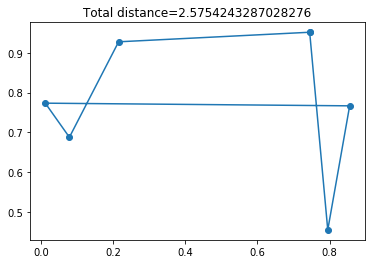

TypeError: 'range' object does not support item assignment

In [8]:
if __name__=='__main__':

    ncity = 6      # Number of cities to visit
    maxTsteps = 100    # Temperature is lowered not more than maxTsteps
    Tstart = 0.2       # Starting temperature - has to be high enough
    fCool = 0.9        # Factor to multiply temperature at each cooling step
    maxSteps = 100*ncity     # Number of steps at constant temperature
    maxAccepted = 10*ncity   # Number of accepted steps at constant temperature

    Preverse = 0.5      # How often to choose reverse/transpose trial move

    # Choosing city coordinates
    R=[]  # coordinates of cities are choosen randomly
    for i in range(ncity):
        R.append( [random.rand(),random.rand()] )
    R = array(R)

    # The index table -- the order the cities are visited.
    city = range(ncity)
    # Distance of the travel at the beginning
    dist = TotalDistance(city, R)
    # print("Total Distance = {}".format(dist))

    # Stores points of a move
    n = zeros(6, dtype=int)
    nct = len(R) # number of cities
    
    T = Tstart # temperature

    Plot(city, R, dist)
    
    for t in range(maxTsteps):  # Over temperature

        accepted = 0
        for i in range(maxSteps): # At each temperature, many Monte Carlo steps
            
            while True: # Will find two random cities sufficiently close by
                # Two cities n[0] and n[1] are choosen at random
                n[0] = int((nct)*random.rand())     # select one city
                n[1] = int((nct-1)*random.rand())   # select another city, but not the same
                if (n[1] >= n[0]): n[1] += 1   #
                if (n[1] < n[0]): (n[0],n[1]) = (n[1],n[0]) # swap, because it must be: n[0]<n[1]
                nn = (n[0]+nct -n[1]-1) % nct  # number of cities not on the segment n[0]..n[1]
                if nn>=3: break
        
            # We want to have one index before and one after the two cities
            # The order hence is [n2,n0,n1,n3]
            n[2] = (n[0]-1) % nct  # index before n0  -- see figure in the lecture notes
            n[3] = (n[1]+1) % nct  # index after n2   -- see figure in the lecture notes
            
            if Preverse > random.rand(): 
                # Here we reverse a segment
                # What would be the cost to reverse the path between city[n[0]]-city[n[1]]?
                de = Distance(R[city[n[2]]],R[city[n[1]]]) + Distance(R[city[n[3]]],R[city[n[0]]]) - Distance(R[city[n[2]]],R[city[n[0]]]) - Distance(R[city[n[3]]],R[city[n[1]]])
                
                if de<0 or exp(-de/T)>random.rand(): # Metropolis
                    accepted += 1
                    dist += de
                    reverse(city, n)
            else:
                # Here we transpose a segment
                nc = (n[1]+1+ int(random.rand()*(nn-1)))%nct  # Another point outside n[0],n[1] segment. See picture in lecture nodes!
                n[4] = nc
                n[5] = (nc+1) % nct
        
                # Cost to transpose a segment
                de = -Distance(R[city[n[1]]],R[city[n[3]]]) - Distance(R[city[n[0]]],R[city[n[2]]]) - Distance(R[city[n[4]]],R[city[n[5]]])
                de += Distance(R[city[n[0]]],R[city[n[4]]]) + Distance(R[city[n[1]]],R[city[n[5]]]) + Distance(R[city[n[2]]],R[city[n[3]]])
                
                if de<0 or exp(-de/T)>random.rand(): # Metropolis
                    accepted += 1
                    dist += de
                    city = transpt(city, n)
                    
            if accepted > maxAccepted: break

        # Plot
        Plot(city, R, dist)
            
        print("T=%10.5f , distance= %10.5f , accepted steps= %d" %(T, dist, accepted))
        T *= fCool             # The system is cooled down
        if accepted == 0: break  # If the path does not want to change any more, we can stop

        
    Plot(city, R, dist)